<a href="https://colab.research.google.com/github/berkezkul/HousingPricePrediction--Mining_and_Machine-Learning/blob/main/HousingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [369]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor   #çok değişkenli aykırı değer yakalama
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [498]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [499]:
def load():
    data = pd.read_csv("/content/sample_data/dataset.csv")         #küçük ölçekli okuma
    return data

In [500]:
df = load()

In [501]:
df.head(10)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,room_and_hall_number,gross_and_net_m2,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,in_this_site,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged
0,"""2799900",137998-55,14.05.2024,Satılık,Daire,Daire,2 + 1,125 m2\n/ 105 m2,2. Kat,3 Yaşında,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250 TL,Evet,"Güney, Doğu",20.000 TL,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""1624000",132292-719,14.05.2024,Satılık,Daire,Daire,2 + 1,98 m2\n/ 91 m2,4. Kat,10 Yaşında,Kombi,20 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Evet (Site Adı Belirtilmemiş),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""10000000",4369-39466,2.05.2024,Satılık,Daire,NaN,3 + 1,175 m2\n/ 160 m2,1. Kat,11 Yaşında,Kombi,8 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,Beş Yıldız Serena Evleri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""11000000",4369-39353,2.05.2024,Satılık,Daire,NaN,3 + 1,168 m2\n/ 152 m2,1. Kat,16 Yaşında,Kombi,9 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,3.35 TL,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,Ağaoğlu My Town Sitesi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""3885000",135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,4 + 2,280 m2\n/ 250 m2,Ara Kat,Sıfır Bina,Kombi,5 Katlı,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"""2460000",135879-14,14.05.2024,Satılık,Daire,NaN,2 + 1,140 m2\n/ 120 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"""1699000",132267-324,14.05.2024,Satılık,Daire,Daire,2 + 1,120 m2\n/ 108 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,Güney,NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"""110000",98015-1975,14.05.2024,Kiralık,Residence,Daire,3 + 1,250 m2\n/ 200 m2,17. Kat,15 Yaşında,Merkezi (Pay Ölçer),50 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"""150000",98015-1979,14.05.2024,Kiralık,Residence,Daire,4 + 1,302 m2\n/ 225 m2,20. Kat,20 Yaşında,Merkezi (Pay Ölçer),27 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"""140000",98015-2005,14.05.2024,Kiralık,Residence,Daire,3 + 1,286 m2\n/ 180 m2,5. Kat,15 Yaşında,Kombi,35 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Selenium Twins Residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [502]:
df['price'] = df['price'].str.replace('"', '').astype(int)

In [503]:
df['dues'] = df['dues'].str.replace(' TL', '').str.replace('.', '').astype(float)

In [504]:
df['deposit'] = df['deposit'].str.replace(' TL', '').str.replace('.', '').astype(float)

In [505]:
df['rental_income'] = df['rental_income'].str.replace(' TL', '').str.replace('.', '').astype(float)

In [506]:
df['floor_number'] = df['floor_number'].str.replace(' Katlı', '').str.replace('.', '').astype(float)

In [508]:
df['gross_m2'] = df['gross_and_net_m2'].str.extract(r'(\d+)\s*m2').astype(float)
df['net_m2'] = df['gross_and_net_m2'].str.extract(r'/\s*(\d+)\s*m2').astype(float)

In [509]:
df[['room_num', 'hall_num']] = df['room_and_hall_number'].str.split('+', expand=True)

In [510]:
df['room_num'] = df['room_num'].astype(float)
df['hall_num'] = df['hall_num'].astype(float)

In [511]:
# room_and_hall_number sütununu kaldırma
df.drop(columns=['room_and_hall_number'], inplace=True)

In [512]:
# gross_and_net_m2 sütununu kaldırma
df.drop(columns=['gross_and_net_m2'], inplace=True)

In [513]:
#3 Yaşında yerine veya Sıfır Bina yerine integer olarak ele aldık.
df['building_age'] = df['building_age'].str.replace(' Yaşında', '')
df['building_age'] = df['building_age'].replace('Sıfır Bina', '0')

In [514]:
#2.Kat vs yerine integer kısmı aldık.
df['which_that_floor'] = df['which_that_floor'].str.replace('. Kat', '')

In [515]:
df['which_that_floor'] = df.apply(lambda row: int(float(row['floor_number']) / 2) if row['which_that_floor'] == 'Ara Kat' else row['which_that_floor'], axis=1)

In [516]:
# Site içerisinde olup olmadığını belirleyen yeni bir sütun oluşturma
df['in_site'] = df['in_this_site'].notna().astype(int)

In [517]:
# Site isimlerini yeni bir sütuna yazma
df['site_name'] = df['in_this_site'].where(df['in_this_site'].notna(), 'No Site')

In [518]:
# Orijinal in_this_site sütununu kaldırma
df.drop(columns=['in_this_site'], inplace=True)

In [519]:
df.head(10)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,Evet,"Güney, Doğu",20000.000,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000,105.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.000,91.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,NaN,1,11,Kombi,8.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000,160.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,NaN,1,16,Kombi,9.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,335.000,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000,152.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.000,250.000,NaN,NaN,NaN,NaN,NaN,4.000,2.000,0,No Site
5,2460000,135879-14,14.05.2024,Satılık,Daire,NaN,2,0,Kombi,4.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.000,120.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
6,1699000,132267-324,14.05.2024,Satılık,Daire,Daire,2,0,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,Güney,NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.000,108.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
7,110000,98015-1975,14.05.2024,Kiralık,Residence,Daire,17,15,Merkezi (Pay Ölçer),50.000,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000,200.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,0,No Site
8,150000,98015-1979,14.05.2024,Kiralık,Residence,Daire,20,20,Merkezi (Pay Ölçer),27.000,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.000,225.000,NaN,NaN,NaN,NaN,NaN,4.000,1.000,0,No Site
9,140000,98015-2005,14.05.2024,Kiralık,Residence,Daire,5,15,Kombi,35.000,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.000,180.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Selenium Twins Residence


**Aykırı Değer İçin Limitleri Belirleme**




In [520]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [521]:
outlier_thresholds(df, "price")

(-44215375.0, 73729225.0)

**Aykırı Değerlerin Tespiti**

In [522]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [343]:
check_outlier(df, "price")

True

In [342]:
check_outlier(df, "dues")

True

*Numerik gözüken ama kategorik, kategorik gözüken ama numerik olan değişkenlerin tespiti: *

In [523]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Notes
    ------

        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        (Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.)
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [524]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 3369
Variables: 41
cat_cols: 27
num_cols: 9
cat_but_car: 5
num_but_cat: 6


In [526]:
cat_cols

['advert_state',
 'house_type',
 'housing_shape',
 'heating_type',
 'credit_elegibility',
 'furniture_status',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'swap',
 'facade',
 'fuel_type',
 'authorized_office',
 'period',
 'guests_number',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'hall_num',
 'in_site']

In [527]:
num_cols

['price',
 'floor_number',
 'bath_number',
 'dues',
 'rental_income',
 'deposit',
 'gross_m2',
 'net_m2',
 'room_num']

In [528]:
cat_but_car

['advert_id',
 'last_update_date',
 'which_that_floor',
 'building_age',
 'site_name']

Normalde sayısal anlam içeren fakat çok az ilanda verisi bulunduğu için kategorik gözüken değerleri ele almak için inceledik.

In [529]:
def get_column_info(df, columns_of_interest):
    """
     Her değişken içindeki sınıfların kaçar tane veri barındırdığını görmek için
    """
    column_info = {}
    for col in columns_of_interest:
        nunique = df[col].nunique()
        value_counts = df[col].value_counts()
        column_info[col] = {
            "unique_value_count": nunique,
            "value_counts": value_counts.to_dict()
        }
    return column_info

In [530]:
columns_interest = ['room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'guests_number',
 'hall_num']

In [531]:
get_column_info(df, columns_interest)

{'room_number': {'unique_value_count': 3,
  'value_counts': {1.0: 30, 2.0: 9, 7.0: 1}},
 'double_beds_number': {'unique_value_count': 3,
  'value_counts': {1.0: 38, 3.0: 1, 2.0: 1}},
 'single_bed_number': {'unique_value_count': 4,
  'value_counts': {2.0: 20, 1.0: 6, 3.0: 1, 4.0: 1}},
 'halls_number': {'unique_value_count': 3,
  'value_counts': {1.0: 34, 4.0: 1, 2.0: 1}},
 'guests_number': {'unique_value_count': 6,
  'value_counts': {'4': 20, '2': 8, '3': 5, '79 m2': 1, '10': 1, '6': 1}},
 'hall_num': {'unique_value_count': 9,
  'value_counts': {1.0: 3024,
   2.0: 251,
   0.0: 27,
   3.0: 16,
   4.0: 6,
   5.0: 2,
   115.0: 1,
   6.0: 1,
   9.0: 1}}}

In [532]:
#herhangi bir transform işlemine girmemeleri adına bu değişkenlere numerik ama az verisi var diyelim.
num_but_has_too_little_data = columns_interest

In [533]:
for col in num_cols:
    print(col, check_outlier(df, col))

price True
floor_number True
bath_number True
dues True
rental_income True
deposit True
gross_m2 True
net_m2 True
room_num True


**Aykırı Değerlere Ulaşmak**


In [534]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [474]:
outlier_thresholds(df, "price")

(-44215375.0, 73729225.0)

In [355]:
check_outlier(df, "price")

True

In [535]:
grab_outliers(df, "price", True)

         price   advert_id last_update_date advert_state house_type   housing_shape which_that_floor building_age         heating_type  floor_number credit_elegibility furniture_status  bath_number structure_type  structure_status using_status title_deed_status  dues   swap                    facade  rental_income fuel_type authorized_office  deposit period  room_number  double_beds_number  single_bed_number  halls_number guests_number  gross_m2  net_m2 invoices_included_in_the_price  \
35   140500000  9636-16728       13.05.2024      Satılık      Daire  Bahçe Dubleksi       Bahçe Katı            7                Klima         3.000              Uygun     Eşyalı Değil        4.000      Betonarme         İkinci El  Mülk Sahibi     Kat Mülkiyeti   NaN  Hayır               Güney, Doğu            NaN  Doğalgaz              Evet      NaN    NaN          NaN                 NaN                NaN           NaN           NaN   320.000 300.000                            NaN   
111  140500000  

Index([35, 111, 191, 243, 283, 284, 290, 306, 307, 314, 315, 316, 317, 322, 323, 325, 328, 329, 330, 334, 336, 337, 341, 342, 344, 346, 348, 350, 357, 359, 360, 373, 376, 396, 461, 468, 597, 969, 1040, 1289, 1327, 1505, 1516, 1777, 1973, 2178, 2187, 2198, 2199, 2288, 2353, 2433, 2459, 2652, 2666, 2681, 2747, 2753, 2873, 2876, 2947, 3228], dtype='int64')

In [476]:
grab_outliers(df, "dues", True)

         price    advert_id last_update_date advert_state house_type    housing_shape which_that_floor building_age heating_type  floor_number credit_elegibility furniture_status  bath_number structure_type structure_status using_status title_deed_status      dues   swap                    facade  rental_income fuel_type authorized_office   deposit period  room_number  double_beds_number  single_bed_number  halls_number guests_number  gross_m2  net_m2 invoices_included_in_the_price  \
396   80000000  33600-49806       28.03.2024      Satılık      Daire  Ara Kat Dubleks                2           30        Kombi         6.000              Uygun              NaN        2.000      Betonarme        İkinci El  Mülk Sahibi     Kat Mülkiyeti 10000.000    NaN                Doğu, Batı            NaN  Doğalgaz              Evet       NaN    NaN          NaN                 NaN                NaN           NaN           NaN   280.000 220.000                            NaN   
490      12000   108

Index([396, 490, 500, 575, 1088, 1128, 1188, 1570, 1758, 1765, 1830, 1895, 1902, 1993, 2080, 2231, 2736, 3077, 3085, 3337], dtype='int64')

In [477]:
grab_outliers(df, "deposit", True)

       price   advert_id last_update_date advert_state house_type  housing_shape which_that_floor building_age         heating_type  floor_number credit_elegibility furniture_status  bath_number structure_type structure_status using_status title_deed_status      dues swap             facade  rental_income fuel_type authorized_office     deposit period  room_number  double_beds_number  single_bed_number  halls_number guests_number  gross_m2  net_m2 invoices_included_in_the_price cleaning_fee  \
338   290000  8525-55618        9.05.2024      Kiralık      Daire     Bahçe Katı       Teras Katı           10              Merkezi        10.000                NaN           Eşyalı        3.000      Betonarme        İkinci El          Boş               NaN       NaN  NaN        Güney, Doğu            NaN  Doğalgaz              Evet  600000.000    NaN          NaN                 NaN                NaN           NaN           NaN   210.000 150.000                            NaN          NaN   
11

Index([338, 1156, 1485, 1957, 1993], dtype='int64')

*Aykırı* değerlerden bazılarını silicez, bazı değişkenleri ise baskılayacağız.

*AYKIRI DEĞER KALDIRMA*

In [253]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [ ]:
#Bütün numerik sütunlardaki aykırı değerlerin tespiti ve kaldırılması
'''
for col in num_cols:
    new_df = remove_outlier(df, col)
    '''

*AYKIRI DEĞER BASKILAMA*

In [536]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Aykırı değer kontrolü:

In [537]:
for col in num_cols:
    print(col, check_outlier(df, col))

price True
floor_number True
bath_number True
dues True
rental_income True
deposit True
gross_m2 True
net_m2 True
room_num True


Baskılama ile dengeleme:

In [538]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [539]:
#son kontrol
check_outlier(df, num_cols)

False

**EKSİK DEĞERLER**

In [483]:
# Eksik gözlem var mı yok mu sorgusu
df.isnull().values.any()

True

In [484]:
# Değişkenlerdeki eksik değer sayısı
df.isnull().sum()

price                                0
advert_id                            0
last_update_date                    40
advert_state                        40
house_type                           0
housing_shape                      582
which_that_floor                   204
building_age                         0
heating_type                         0
floor_number                         0
credit_elegibility                1042
furniture_status                   228
bath_number                          1
structure_type                     822
structure_status                   772
using_status                       206
title_deed_status                 1259
dues                              1906
swap                              1325
facade                             665
rental_income                     2503
fuel_type                          634
authorized_office                  996
deposit                           2714
period                            3329
room_number              

In [485]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [540]:
missing_values_table(df)

missing_values_table(df, True)

                                n_miss  ratio
pets_allowed                      3367 99.940
entertainment_arranged            3365 99.880
invoices_included_in_the_price    3352 99.500
video_calling                     3349 99.410
single_bed_number                 3341 99.170
cleaning_fee                      3334 98.960
guests_number                     3333 98.930
halls_number                      3333 98.930
double_beds_number                3329 98.810
room_number                       3329 98.810
period                            3329 98.810
deposit                           2714 80.560
rental_income                     2503 74.300
dues                              1906 56.570
swap                              1325 39.330
title_deed_status                 1259 37.370
credit_elegibility                1042 30.930
authorized_office                  996 29.560
structure_type                     822 24.400
structure_status                   772 22.910
facade                            

['last_update_date',
 'advert_state',
 'housing_shape',
 'which_that_floor',
 'credit_elegibility',
 'furniture_status',
 'bath_number',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'dues',
 'swap',
 'facade',
 'rental_income',
 'fuel_type',
 'authorized_office',
 'deposit',
 'period',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'guests_number',
 'gross_m2',
 'net_m2',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged',
 'room_num',
 'hall_num']

**Eksik Değeri Problemini Çözme**

In [541]:
# %90'dan fazla eksik değeri olan sütunları kaldırdık.
threshold = 0.90
df = df[df.columns[df.isnull().mean() < threshold]]

In [542]:
# Kategorik değişkenleri mod ile doldurduk.
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 13) else x, axis=0)

In [543]:
# Sayısal değişkenleri median ile doldurduk.
df = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

In [597]:
df['which_that_floor'].fillna(int(df['floor_number'].mean()), inplace=True)

In [600]:
mean_floor = int(df['floor_number'].mean(skipna=True))
df['which_that_floor'] = df['which_that_floor'].apply(
    lambda x: mean_floor if not str(x).isdigit() else x
)

In [546]:
# Eksik gözlem var mı yok mu sorgusu
df.isnull().values.any()

True

In [547]:
# Değişkenlerdeki eksik değer sayısı
df.isnull().sum()

price                   0
advert_id               0
last_update_date       40
advert_state            0
house_type              0
housing_shape           0
which_that_floor        0
building_age            0
heating_type            0
floor_number            0
credit_elegibility      0
furniture_status        0
bath_number             0
structure_type          0
structure_status        0
using_status            0
title_deed_status       0
dues                    0
swap                    0
facade                665
rental_income           0
fuel_type               0
authorized_office       0
deposit                 0
gross_m2                0
net_m2                  0
room_num                0
hall_num                0
in_site                 0
site_name               0
dtype: int64

In [259]:
# Kategorik değişken kırılımında sayısal değişkenleri doldurmak
#df["price"].fillna(df.groupby("house_type")["price"].transform("mean")).isnull().sum()

0

In [548]:
df.head()

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,Evet,"Güney, Doğu",20000.000,Doğalgaz,Evet,25000.000,125.000,105.000,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,Hayır,"Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,25000.000,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,Daire,1,11,Kombi,8.000,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,200.000,Hayır,"Güney, Doğu",20000.000,Doğalgaz,Evet,25000.000,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,Daire,1,16,Kombi,9.000,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,335.000,Hayır,"Güney, Batı",20000.000,Doğalgaz,Evet,25000.000,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,Evet,"Kuzey, Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,25000.000,280.000,250.000,4.000,2.000,0,No Site


**TRANSFORMING**

Label Encoding

---



In [549]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [551]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [555]:
binary_cols

['advert_state', 'furniture_status', 'swap']

In [552]:
for col in binary_cols:
    df = label_encoder(df, col)

In [554]:
df.head()

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,1,Daire,Daire,2,3,Kombi,4.000,Uygun,1,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,0,"Güney, Doğu",20000.000,Doğalgaz,Evet,25000.000,125.000,105.000,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,1,Daire,Daire,4,10,Kombi,20.000,Uygun,1,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,1,"Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,25000.000,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,1,Daire,Daire,1,11,Kombi,8.000,Uygun,1,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,200.000,1,"Güney, Doğu",20000.000,Doğalgaz,Evet,25000.000,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,1,Daire,Daire,1,16,Kombi,9.000,Uygun,1,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,335.000,1,"Güney, Batı",20000.000,Doğalgaz,Evet,25000.000,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,1,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,1,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,25000.000,280.000,250.000,4.000,2.000,0,No Site


One Hot Encoding

---



Değişken sayısı 2'den fazla olan 10'dan az olan değişkenler için yapıyoruz.

In [556]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 and col not in num_cols and col not in num_but_has_too_little_data]

In [557]:
ohe_cols

['credit_elegibility',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'fuel_type']

In [558]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [559]:
one_hot_encoder(df, ohe_cols).head(30)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,furniture_status,bath_number,dues,swap,facade,rental_income,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun
0,2799900,137998-55,14.05.2024,1,Daire,Daire,2,3,Kombi,4.000,1,1.000,250.000,0,"Güney, Doğu",20000.000,Evet,25000.000,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
1,1624000,132292-719,14.05.2024,1,Daire,Daire,4,10,Kombi,20.000,1,1.000,200.000,1,"Güney, Doğu, Batı",20000.000,Evet,25000.000,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False
2,10000000,4369-39466,2.05.2024,1,Daire,Daire,1,11,Kombi,8.000,1,2.000,200.000,1,"Güney, Doğu",20000.000,Evet,25000.000,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False
3,11000000,4369-39353,2.05.2024,1,Daire,Daire,1,16,Kombi,9.000,1,2.000,335.000,1,"Güney, Batı",20000.000,Evet,25000.000,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False
4,3885000,135879-54,14.05.2024,1,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,1,3.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,25000.000,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False
5,2460000,135879-14,14.05.2024,1,Daire,Daire,2,0,Kombi,4.000,1,2.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,25000.000,140.000,120.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
6,1699000,132267-324,14.05.2024,1,Daire,Daire,2,0,Kombi,4.000,1,1.000,200.000,0,Güney,20000.000,Evet,25000.000,120.000,108.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False
7,110000,98015-1975,14.05.2024,0,Residence,Daire,17,15,Merkezi (Pay Ölçer),45.500,1,3.000,200.000,1,"Güney, Doğu, Batı",20000.000,Evet,25000.000,250.000,200.000,3.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
8,150000,98015-1979,14.05.2024,0,Residence,Daire,20,20,Merkezi (Pay Ölçer),27.000,1,3.000,200.000,1,"Güney, Doğu, Batı",20000.000,Evet,25000.000,302.000,225.000,4.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
9,140000,98015-2005,14.05.2024,0,Residence,Daire,5,15,Kombi,35.000,1,3.000,200.000,1,"Güney, Doğu, Batı",20000.000,Evet,25000.000,286.000,180.000,3.000,1.000,1,Selenium Twins Residence,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False


In [560]:
df = one_hot_encoder(df, ohe_cols)

In [561]:
columns = ['house_type', 'housing_shape', 'heating_type']

In [562]:
get_column_info(df, columns)

{'house_type': {'unique_value_count': 12,
  'value_counts': {'Daire': 2987,
   'Villa': 155,
   'Residence': 145,
   'Müstakil Ev': 38,
   'Bina': 20,
   'Yalı': 9,
   'Yazlık': 6,
   'Köşk': 4,
   'Çiftlik Evi': 2,
   'Bungalov': 1,
   'Yalı Dairesi': 1,
   'Prefabrik': 1}},
 'housing_shape': {'unique_value_count': 12,
  'value_counts': {'Daire': 2799,
   'Bahçe Katı': 126,
   'Çatı Dubleksi': 124,
   'Dubleks': 116,
   'Müstakil Ev': 68,
   'Tripleks': 47,
   'Bahçe Dubleksi': 33,
   'Ara Kat Dubleks': 24,
   'Fourlex': 17,
   'Ters Dubleks': 11,
   'İkiz Ev': 3,
   '1': 1}},
 'heating_type': {'unique_value_count': 13,
  'value_counts': {'Kombi': 2399,
   'Merkezi (Pay Ölçer)': 503,
   'Merkezi': 284,
   'Yerden Isıtma': 82,
   'Kat Kaloriferi': 22,
   'Soba': 19,
   'Klima': 17,
   'Doğalgaz Sobası': 15,
   'VRV': 10,
   'Isıtma Yok': 8,
   'Fancoil Ünitesi': 5,
   'Belirtilmemiş': 3,
   'Güneş Enerjisi': 2}}}

In [563]:
#house_type ve housing_shape 'te 12 farklı sınıf var heating_type'ta da 13 sınıf var. Bu yüzden one hot encoding olmamış. Onları da encode etmek adına 12 ile sınırlıyoruz.
ohe_cols = [col for col in df.columns if 13 >= df[col].nunique() > 2 and col not in num_cols and col not in num_but_has_too_little_data]

In [564]:
df = one_hot_encoder(df, ohe_cols)

In [565]:
df.head(20)

,price,advert_id,last_update_date,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,facade,rental_income,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma
0,2799900,137998-55,14.05.2024,1,2,3,4.000,1,1.000,250.000,0,"Güney, Doğu",20000.000,Evet,25000.000,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1624000,132292-719,14.05.2024,1,4,10,20.000,1,1.000,200.000,1,"Güney, Doğu, Batı",20000.000,Evet,25000.000,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,10000000,4369-39466,2.05.2024,1,1,11,8.000,1,2.000,200.000,1,"Güney, Doğu",20000.000,Evet,25000.000,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,11000000,4369-39353,2.05.2024,1,1,16,9.000,1,2.000,335.000,1,"Güney, Batı",20000.000,Evet,25000.000,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,3885000,135879-54,14.05.2024,1,2,0,5.000,1,3.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,25000.000,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,2460000,135879-14,14.05.2024,1,2,0,4.000,1,2.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,25000.000,140.000,120.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,

In [566]:
# Facade sütunundaki yönleri ayırarak one-hot encoding yapmtık
facade_dummies = df['facade'].str.get_dummies(sep=', ')

In [568]:
# Yeni sütun isimlerini değiştirdik
facade_dummies.columns = ['facade_' + col.lower() for col in facade_dummies.columns]

In [569]:
# Orijinal dataframe ile yeni dummy dataframe'i birleştirdik
df = pd.concat([df, facade_dummies], axis=1)

In [570]:
df.drop(columns=['facade'], inplace=True)

In [571]:
df.head()

,price,advert_id,last_update_date,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_facade_batı,facade_facade_doğu,facade_facade_güney,facade_facade_kuzey
0,2799900,137998-55,14.05.2024,1,2,3,4.000,1,1.000,250.000,0,20000.000,Evet,25000.000,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,132292-719,14.05.2024,1,4,10,20.000,1,1.000,200.000,1,20000.000,Evet,25000.000,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,4369-39466,2.05.2024,1,1,11,8.000,1,2.000,200.000,1,20000.000,Evet,25000.000,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,4369-39353,2.05.2024,1,1,16,9.000,1,2.000,335.000,1,20000.000,Evet,25000.000,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,135879-54,14.05.2024,1,2,0,5.000,1,3.000,200.000,0,20000.000,Evet,25000.000,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1


In [572]:
get_column_info(df, ['authorized_office'])

{'authorized_office': {'unique_value_count': 1,
  'value_counts': {'Evet': 3369}}}

In [573]:
df = label_encoder(df, 'authorized_office')

In [574]:
df.drop(columns=['advert_id', 'last_update_date'], inplace=True)

In [575]:
df.head()

,price,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_facade_batı,facade_facade_doğu,facade_facade_güney,facade_facade_kuzey
0,2799900,1,2,3,4.000,1,1.000,250.000,0,20000.000,0,25000.000,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,1,4,10,20.000,1,1.000,200.000,1,20000.000,0,25000.000,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,1,1,11,8.000,1,2.000,200.000,1,20000.000,0,25000.000,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,1,1,16,9.000,1,2.000,335.000,1,20000.000,0,25000.000,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,1,2,0,5.000,1,3.000,200.000,0,20000.000,0,25000.000,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1


In [576]:
df.drop(columns=['site_name'], inplace=True)

In [577]:
df.head()

,price,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_facade_batı,facade_facade_doğu,facade_facade_güney,facade_facade_kuzey
0,2799900,1,2,3,4.000,1,1.000,250.000,0,20000.000,0,25000.000,125.000,105.000,2.000,1.000,0,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,1,4,10,20.000,1,1.000,200.000,1,20000.000,0,25000.000,98.000,91.000,2.000,1.000,1,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,1,1,11,8.000,1,2.000,200.000,1,20000.000,0,25000.000,175.000,160.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,1,1,16,9.000,1,2.000,335.000,1,20000.000,0,25000.000,168.000,152.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,1,2,0,5.000,1,3.000,200.000,0,20000.000,0,25000.000,280.000,250.000,4.000,2.000,0,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1


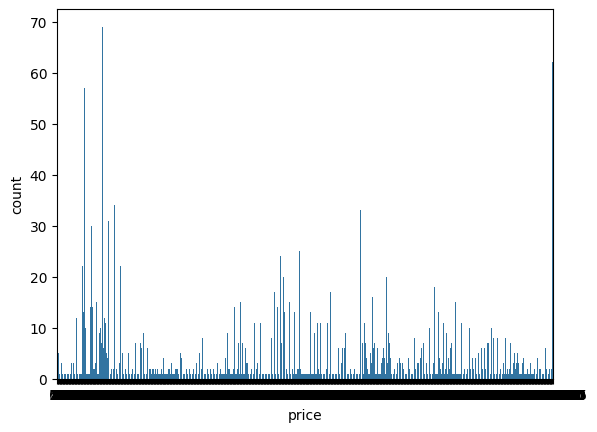

In [581]:
sns.countplot(x="price", data=df)
plt.show()

In [582]:
100 * df["price"].value_counts() / len(df)

price
25000      2.048
73729225   1.840
20000      1.722
15000      1.692
35000      1.009
5500000    0.980
16000      0.920
30000      0.920
17000      0.920
18000      0.890
7500000    0.890
10000      0.861
22000      0.801
12000      0.772
3500000    0.742
3000000    0.712
4500000    0.712
6500000    0.653
14000      0.653
40000      0.653
50000      0.623
6000000    0.623
3250000    0.623
7000000    0.594
3100000    0.594
4250000    0.564
5250000    0.564
2500000    0.534
11000000   0.534
2850000    0.505
13000      0.505
45000      0.505
4200000    0.505
6250000    0.475
5000000    0.475
8000000    0.475
6750000    0.475
3200000    0.475
5350000    0.475
3300000    0.445
21000      0.445
4000000    0.445
2350000    0.445
13500000   0.445
8500000    0.416
2250000    0.416
17500      0.416
4750000    0.416
19000      0.416
5950000    0.416
2950000    0.416
11500000   0.386
3400000    0.386
3150000    0.386
14500      0.386
3750000    0.386
18500      0.386
4150000    0.356
80000   

Değişkenlerin Analizi

In [583]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3369.000,7276828.879,12900792.348,55.000,45000.000,3295000.000,7500000.000,73729225.000
advert_state,3369.000,0.695,0.461,0.000,0.000,1.000,1.000,1.000
floor_number,3369.000,7.315,6.730,1.000,4.000,5.000,8.000,45.500
furniture_status,3369.000,0.891,0.312,0.000,1.000,1.000,1.000,1.000
bath_number,3369.000,1.575,0.875,1.000,1.000,1.000,2.000,6.000
dues,3369.000,433.553,939.981,1.000,200.000,200.000,200.000,7985.000
swap,3369.000,0.885,0.319,0.000,1.000,1.000,1.000,1.000
rental_income,3369.000,21822.540,11952.205,1.000,20000.000,20000.000,20000.000,147500.000
authorized_office,3369.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
deposit,3369.000,27901.050,22115.899,1.000,25000.000,25000.000,25000.000,317500.000


In [595]:
for col in df.columns:
    df[col] = RobustScaler().fit_transform(df[[col]])

ValueError: could not convert string to float: 'Bahçe Katı'

In [601]:
df.head(30)

,price,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,deposit,gross_m2,net_m2,room_num,hall_num,in_site,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_facade_batı,facade_facade_doğu,facade_facade_güney,facade_facade_kuzey
0,-0.066,0.000,2,3,4.000,1,1.000,250.000,0,20000.000,0,25000.000,125.000,105.000,2.000,1.000,0,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,-0.224,0.000,4,10,20.000,1,1.000,200.000,1,20000.000,0,25000.000,98.000,91.000,2.000,1.000,1,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,0.899,0.000,1,11,8.000,1,2.000,200.000,1,20000.000,0,25000.000,175.000,160.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,1.034,0.000,1,16,9.000,1,2.000,335.000,1,20000.000,0,25000.000,168.000,152.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,0.079,0.000,2,0,5.000,1,3.000,200.000,0,20000.000,0,25000.000,280.000,250.000,4.000,2.000,0,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1
5,-0.112,0.000,2,0,4.000,1,2.000,200.000,0,20000.000,0,25000.000,140.000,120.000,2.000,1.000,0,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1
6,-0.214,0.000,2,0,4.0

**MODEL**

In [617]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Ridge


In [609]:
X = df.drop(["price"], axis=1)
y = df["price"]

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [611]:
# Modeli oluşturma ve eğitme
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [612]:
# Tahmin yapma
y_pred = linear_model.predict(X_test)

In [613]:
# Model değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [614]:
mse

1.5167077058360756

In [615]:
r2

0.5143852095340535